## Tugas Assignment 1

Pada Tugas Assignment 1, mante melakukan pengolahan dataset yang kemudian di Visualisasikan ke dalam beberapa plot, seperti:
1. Line Chart
2. Area Plots
3. Histogram
4. Bar Chart
5. Pie Chart
6. Box Chart
7. Scatter Plots
8. Regression Plots
9. WordCloud dan Masking
10. Map 

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import folium 

mpl.style.use('fivethirtyeight')
print('Matplotlib version: ', mpl.__version__)


Matplotlib version:  3.5.2


In [2]:
london_crime = pd.read_csv(
    "D:\semester 6\satu\Tgs Assignment\data\london_crime.csv"
) # Load Dataset

In [3]:
london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# Untuk mengatahui kolom apa saja di dataset
london_crime.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [7]:
# Untuk mengetahui jumlah baris dan kolom di dataset
london_crime.shape

(13490604, 7)

In [8]:
# Mengganti nama kolom
london_crime.rename(columns={"borough": "wilayah"}, inplace=True)

In [9]:
london_crime['Total'] = london_crime.sum(axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5992\1423407226.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  london_crime['Total'] = london_crime.sum(axis=1)


In [10]:
# Melihat statistik deskriptif dari data
london_crime.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0
Total,13490604.0,2018.977944,4.660875,2009.0,2016.00,2019.0,2022.00,2327.0


## Lines Chart

Pada Line Chart ini saya mencoba mencari seberapa banyak kejahatan di London pada tahun 2008-2016 dengan membandingkan antara tahun dan value dari dataset tersebut. Dan dapat ditarik kesimpulan:
1. Kejahatan di Tahun 2010 dan 2016 adalah yang tertinggi
2. Tahun 2013-2014 adalah tahun dimana kejahatan mengalami penurunan yang cukup signifikan 

In [11]:
data_crime = london_crime[['wilayah','value']]

Text(0, 0.5, 'No of crimes')

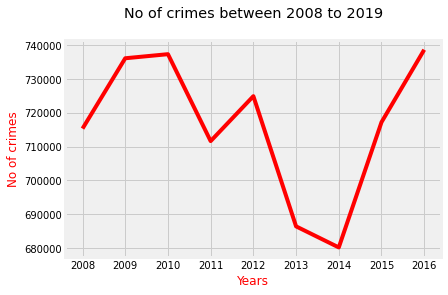

In [12]:
Year=london_crime['year'].unique()
sumsandyear=london_crime.groupby('year').sum()
sums=sumsandyear['value'].to_numpy()

n = len(Year)

for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]

plt.plot(Year, sums,color='Red')
plt.title("No of crimes between 2008 to 2019\n")
plt.xlabel('Years',color='Red')
plt.ylabel("No of crimes",color='Red')

## Area Chart

Mencari top 7 wilayah dari jumlah kasus kemudian diurutkan dari jumlah kasus kejahatan tertinggi sampai terendah

In [13]:
wilayah = london_crime['wilayah'].value_counts().sort_values(ascending=False).head(7)
wilayah

Croydon       602100
Barnet        572832
Ealing        549396
Bromley       523908
Lambeth       519048
Enfield       511164
Wandsworth    498636
Name: wilayah, dtype: int64

Melakukan visualisasi data area plot berdasarkan wilayah

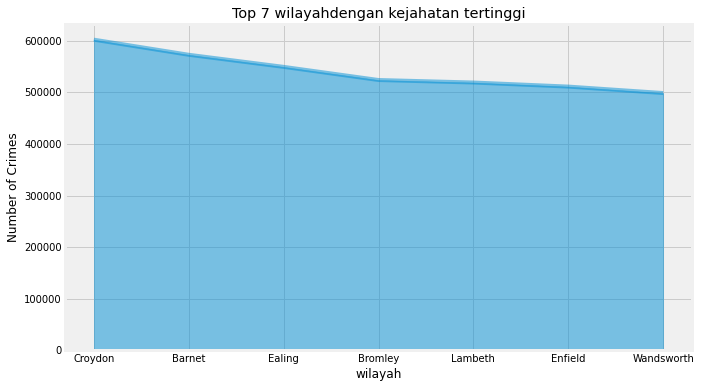

In [14]:
wilayah.plot(kind='area', figsize=(10, 6), stacked=False)
plt.title('Top 7 wilayahdengan kejahatan tertinggi')
plt.ylabel('Number of Crimes')
plt.xlabel('wilayah')
plt.show()

## Histogram

In [15]:
london_crime["month"].head()

0    11
1    11
2     5
3     3
4     6
Name: month, dtype: int64

In [16]:
count, bin_edges = np.histogram(london_crime["month"],bins=7)

In [17]:
print(count)
print(bin_edges)

[2248434 2248434 1124217 2248434 1124217 2248434 2248434]
[ 1.          2.57142857  4.14285714  5.71428571  7.28571429  8.85714286
 10.42857143 12.        ]


Text(0.5, 0, 'Month')

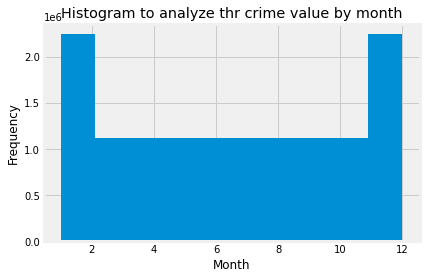

In [18]:
ax = london_crime["month"].plot(kind='hist')

ax.set_title("Histogram to analyze thr crime value by month")
ax.set_xlabel("Month")

## Bar Chart

Melihat type kejahatan dengan jumlah kriminalitas berdasarkan major category, dan disimpulkan Theft and Headling adalah yang paling tinggi

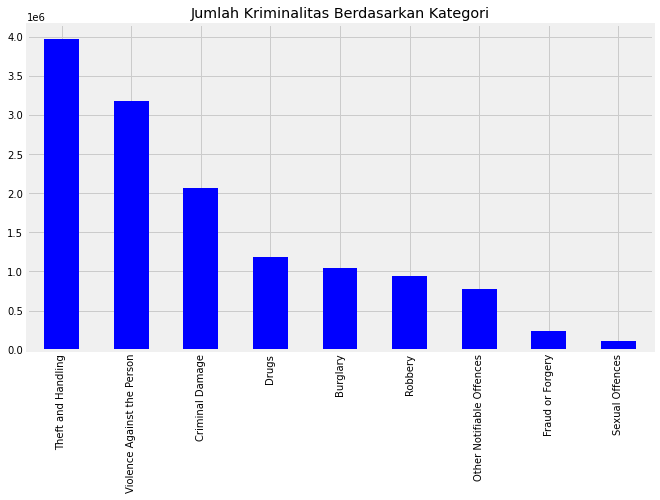

In [19]:
ax = london_crime['major_category'].value_counts().plot(kind='bar',color='blue', figsize=(10,6), title="Jumlah Kriminalitas Berdasarkan Kategori")

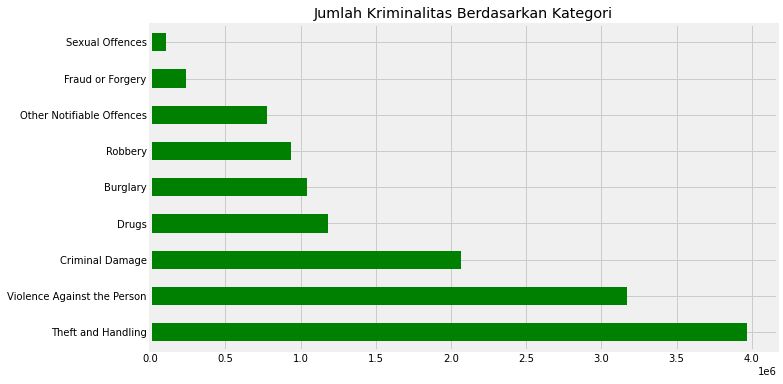

In [20]:
ax = london_crime['major_category'].value_counts().plot(kind='barh',color='green', figsize=(10,6), title="Jumlah Kriminalitas Berdasarkan Kategori")

## Pie Chart

Disini saya mencari nilai kejahatan major category dengan perbandingannya adalah bulan menggunakan pie chart dan didapatkan hasil bahwa Theft and Handling dan Violence againt the person adalah type yang paling tinggi  

In [21]:
major_data = london_crime.groupby("major_category", axis=0).sum()

<AxesSubplot:ylabel='month'>

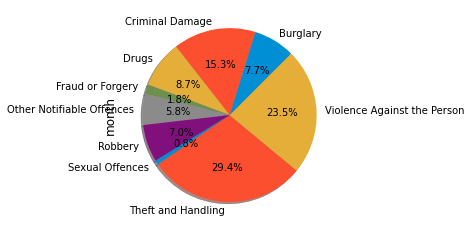

In [22]:
major_data['month'].plot(
    kind='pie'
    ,autopct='%1.1f%%'
    ,startangle=45
    ,shadow=True
)

Menambahkan judul dan keterangan warna pada type kejahatan agar mudah dipahami

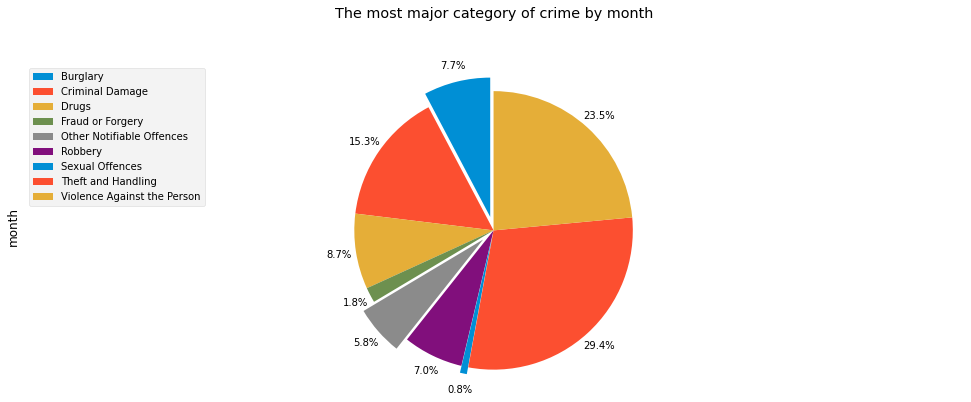

In [23]:
color_list = ["gold", "yellowgreen", "lightskyblue", "lightgreen", "pink", "yellow",'lightsteelblue','cornflowerblue','paleturquoise']


major_data['month'].plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    # ,shadow=True
    ,labels=None
    # ,colors=color_list
    ,pctdistance=1.12
    ,explode = [0.1,0,0,0,0.1,0,0.05,0,0]
)

plt.title("The most major category of crime by month", y=1.12)
plt.axis('equal')
plt.legend(labels=major_data.index, loc='upper left')

## Box Plot

Membuat data frame baru untuk mengetahui jumlah kasus kejahatan berdasarkan kategori dan bulan

In [24]:

crime_box = london_crime.groupby(
    ['major_category',
     'month'
     ]).size().reset_index(name='count')
crime_box

,major_category,month,count
0,Burglary,1,86967
1,Burglary,2,86967
2,Burglary,3,86967
3,Burglary,4,86967
4,Burglary,5,86967
...,...,...,...
103,Violence Against the Person,8,264312
104,Violence Against the Person,9,264312
105,Violence Against the Person,10,264312
106,Violence Against the Person,11,264312


{'whiskers': [<matplotlib.lines.Line2D at 0x24cb29b35b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24cb29b3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cb29b32e0>],
 'medians': [<matplotlib.lines.Line2D at 0x24cb29bf130>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cb29bf400>],
 'means': []}

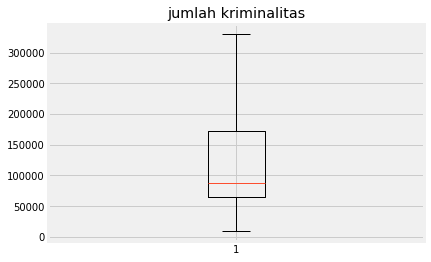

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('jumlah kriminalitas')
ax1.boxplot(crime_box['count'])

## Scatter Plot

Scatter plot untuk mengetahui hubungan antara jumlah kejahatan dengan jumlah kejahatan yang terjadi pada bulan yang sama

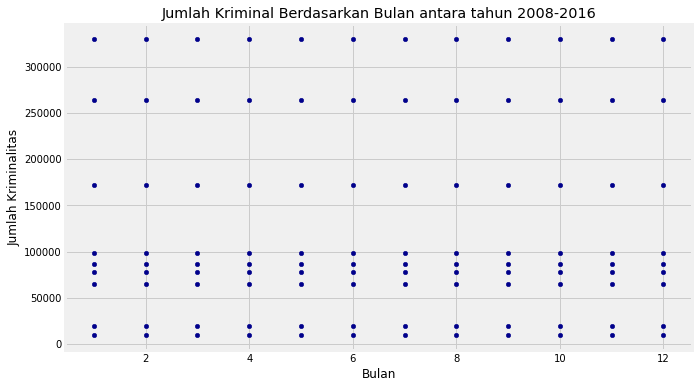

In [26]:
crime_box.plot(
    kind='scatter', 
    x='month', 
    y='count', 
    figsize=(10, 6), 
    color='darkblue'
)
plt.title('Jumlah Kriminal Berdasarkan Bulan antara tahun 2008-2016')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kriminalitas')
plt.show()

## Regression Plot

Text(0.5, 1.0, 'Total Immigration to Canada from 2008 to 2016')

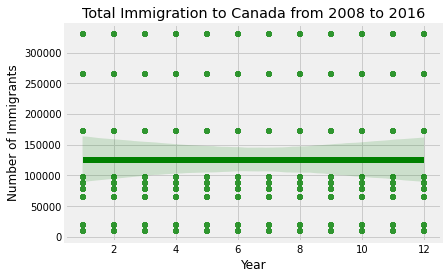

<Figure size 1080x720 with 0 Axes>

In [31]:

ax = sns.regplot(x='month', y='count', data=crime_box,color='green', marker='+')
plt.figure(figsize=(15,10))
ax.set_xlabel("Year")
ax.set_ylabel("Number of Immigrants")
ax.set_title("Total Immigration to Canada from 2008 to 2016")

## Wordcloud

Menampilkan wilayah yang paling banyak terdapat kejahatan pada file london_crime_by_lsoa, dengan ditampilkan menggunakan WordCloud. Dan dari file tersebut dapat ditarik kesimpulan wilayah yang sering terdapat kejahatan adalah:
Waltham, Forest, upon, Thames, Tower, dan Hamlets

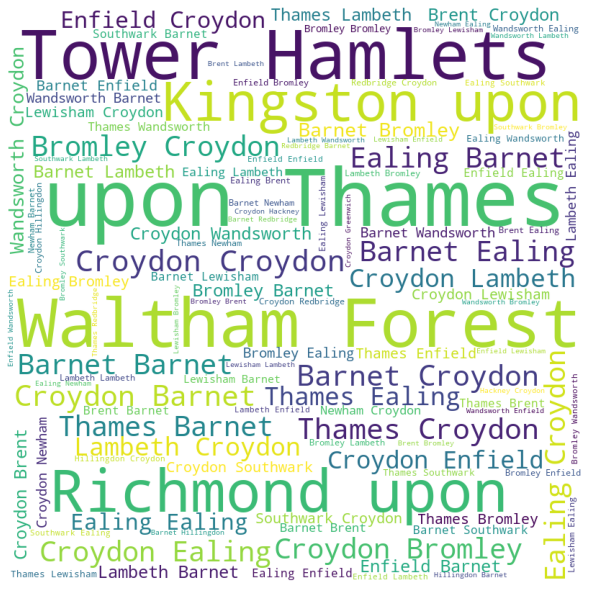

In [ ]:
all_text = " ".join(london_crime["wilayah"].values)

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(all_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Masking

In [ ]:
# menambahkan gambar untuk mempercantik wordcloud
crime_mask = np.array(Image.open('D:\semester 6\satu\Tgs Assignment\data\l.jpg'))

In [ ]:
crime_mask[200:301,200:301]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(-0.5, 999.5, 988.5, -0.5)

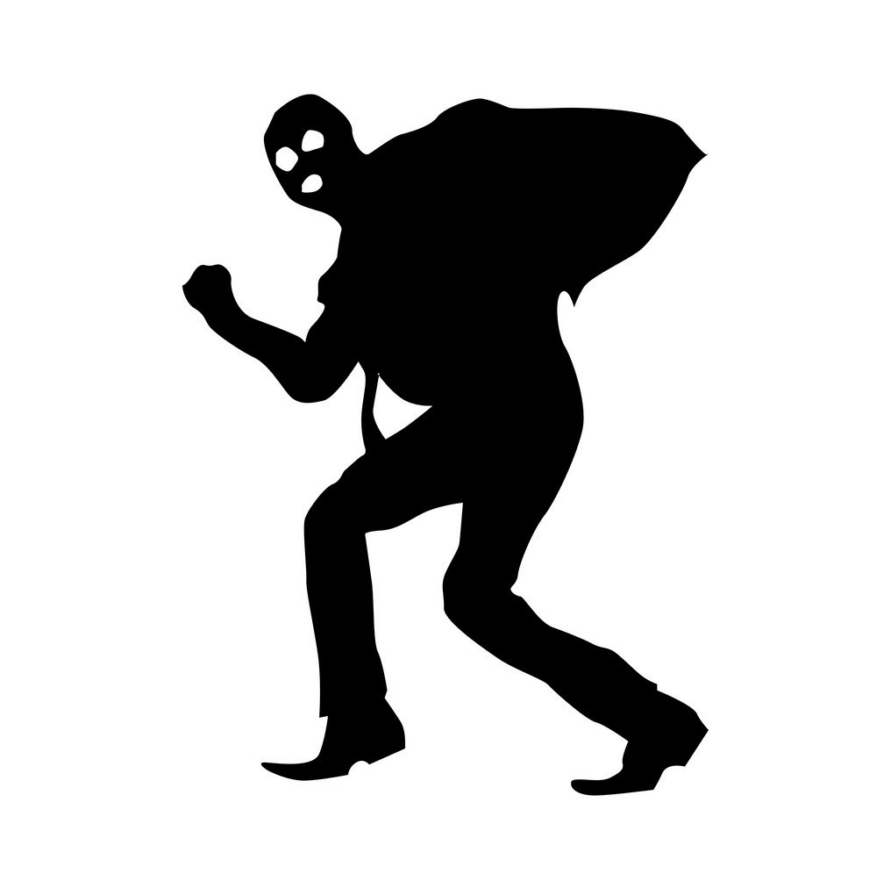

In [ ]:
# Memvisualisasi gambar ke plot
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(crime_mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')

(-0.5, 999.5, 988.5, -0.5)

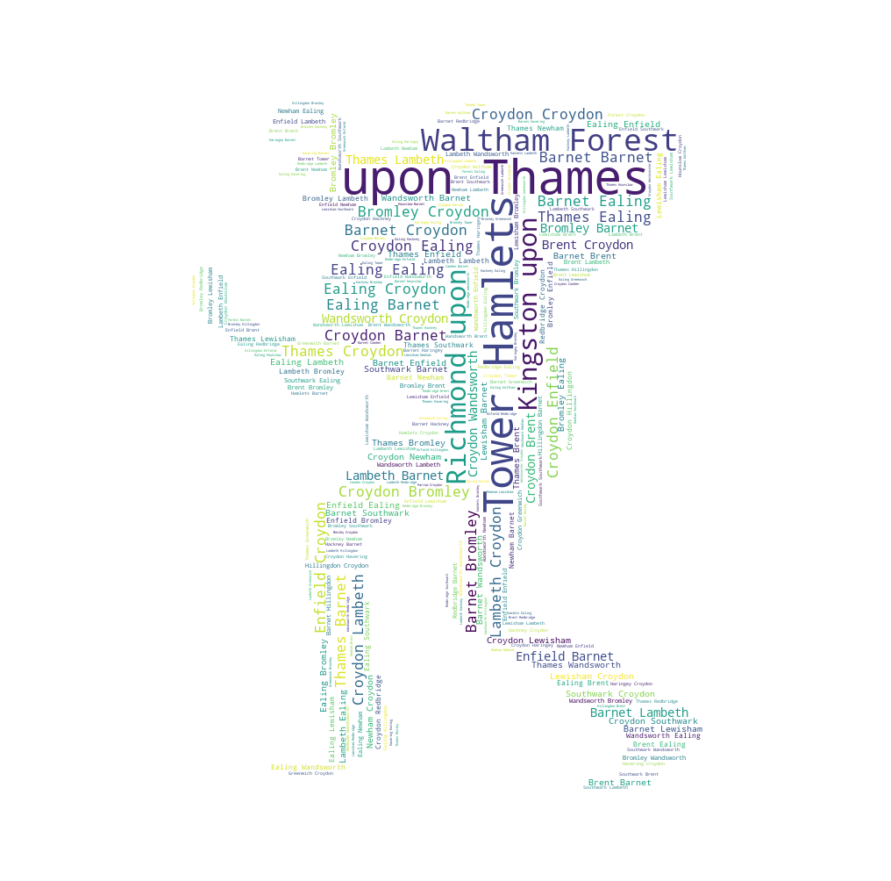

In [ ]:
# Hasil dari gambar yang telah diplot
wordcloud = WordCloud(
    background_color = 'white'
    , max_words=2000
    , stopwords=STOPWORDS
    , mask=crime_mask
)

wordcloud.generate(all_text)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

## Map

In [ ]:
london_crime

,lsoa_code,wilayah,major_category,minor_category,value,year,month,Total
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2027
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2027
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2020
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2019
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2014
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2017
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2022
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2013
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2016


In [ ]:
# membuat data frame baru untuk memasukan latitude dan longitude dari setiap borough
wilayah = {
        'wilayah': ['Barking and Dagenham',
         'Barnet', 'Bexley', 'Brent',
          'Bromley', 'Camden', 'City of London',
           'Croydon', 'Ealing', 'Enfield', 'Greenwich',
            'Hackney', 'Hammersmith and Fulham', 'Haringey',
             'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
              'Islington', 'Kensington and Chelsea',
               'Kingston upon Thames', 'Lambeth',
                'Lewisham', 'Merton', 'Newham',
                 'Redbridge', 'Richmond upon Thames',
                  'Southwark', 'Sutton', 'Tower Hamlets',
                   'Waltham Forest', 'Wandsworth', 'Westminster'],
        'latitude': [51.5607, 51.6252, 51.4549, 51.5588, 51.4039, 51.5290, 51.5155, 51.3714, 51.5130, 51.6538, 51.4892, 51.5450, 51.4927, 51.6000, 51.5898, 51.5812, 51.5441, 51.4746, 51.5416, 51.5020, 51.4085, 51.4479, 51.4607, 51.4452, 51.4014, 51.5077, 51.5590, 51.4479, 51.5035, 51.3618, 51.5099, 51.5908, 51.4567],
        'longitude': [0.1557, -0.1517, 0.1505, -0.2817, 0.0198, -0.1255, -0.0922, -0.0977, -0.3089, -0.0799, 0.0648, -0.0553, -0.2339, -0.1119, -0.3346, 0.1837, -0.4760, -0.3680, -0.1022, -0.1947, -0.3064, -0.0203, -0.1163, -0.0209, -0.1958, 0.0469, 0.0741, -0.3260, -0.0804, -0.1945, -0.0059, -0.1910, -0.1910]}

In [ ]:
wilayah_df = pd.DataFrame(wilayah)

In [ ]:
# borough_df to csv
wilayah_df.to_csv('wilayah.csv', index=False)

In [ ]:
wilayah_df

,wilayah,latitude,longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,City of London,51.5155,-0.0922
7,Croydon,51.3714,-0.0977
8,Ealing,51.5130,-0.3089
9,Enfield,51.6538,-0.0799


In [ ]:
map_data = london_crime.groupby(['wilayah', 'major_category']).size().reset_index(name='count')
map_data

,wilayah,major_category,count
0,Barking and Dagenham,Burglary,23760
1,Barking and Dagenham,Criminal Damage,46764
2,Barking and Dagenham,Drugs,26244
3,Barking and Dagenham,Fraud or Forgery,7236
4,Barking and Dagenham,Other Notifiable Offences,17496
...,...,...,...
290,Westminster,Other Notifiable Offences,21924
291,Westminster,Robbery,25056
292,Westminster,Sexual Offences,3672
293,Westminster,Theft and Handling,107136


Membuat map dengan lokasi borough

In [ ]:
map = folium.Map(location=[51.5074, 0.1278], zoom_start=10)

Membuat feature group untuk menampilkan marker

In [ ]:

incident = folium.map.FeatureGroup() 

Menampilkan marker dan menambah incident ke map

In [ ]:
for lat, lng, in zip(wilayah_df.latitude, wilayah_df.longitude):
    incident.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

map.add_child(incident)

menambahkan pop up nama kota

In [ ]:
for lat, lng, wilayah in zip(
    wilayah_df.latitude, 
    wilayah_df.longitude, 
    wilayah_df.wilayah):
    folium.Marker([
        lat, lng],
         popup=wilayah

).add_to(map)

In [ ]:
map